<a href="https://colab.research.google.com/github/Dhruva-17/HDS5210_InClass/blob/master/final/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Customer Demographics and Sales Trends to Enhance Subscription-Based Business Strategies**

**Introduction**:

This project explores the interplay between customer demographics and sales data in subscription-based business models. Leveraging two comprehensive datasets, one detailing customer profiles and the other capturing extensive sales records, the study aims to identify key trends and correlations that influence subscription plan preferences and purchasing behaviors across different demographics. By analyzing factors such as age, gender, income, and geographic distribution alongside sales performance metrics, the project seeks to provide actionable insights to optimize customer engagement strategies and drive business growth.

# **Data Access**

**Define** **Functions**

The provided code snippet is designed to load and analyze two datasets: one in CSV format containing sales data and another in JSON format containing customer data. Here's a breakdown of its components:

1. load_sales_data Function
Purpose: Load sales data from a CSV file into a Pandas DataFrame.
Key Steps:
Uses pd.read_csv to read the CSV file.
Handles exceptions such as:
FileNotFoundError: Prints an error if the file is not found.
Other exceptions: Prints the error message for debugging.
2. load_customer_data Function
Purpose: Load customer data from a JSON file into a Pandas DataFrame.
Key Steps:
Uses pd.read_json with the parameters orient="records" and lines=True to handle JSON files structured as lines of individual records.
Exception handling is similar to the load_sales_data function.
3. display_dataset_info Function
Purpose: Display a quick summary of the datasets, including:
First five rows of each DataFrame (head() method).
Shape of the DataFrame (number of rows and columns) using the shape attribute.
Key Logic:
Verifies if the DataFrame is loaded successfully before attempting to display its information.
4. Main Script
Specifies the file paths for the sales and customer data files.
Calls the respective functions to load the datasets.
Displays a summary of the loaded datasets using display_dataset_info.

In [18]:
import pandas as pd

def load_sales_data(file_path):
    """
    Load the sales dataset from a CSV file.

    Args:
    - file_path (str): The file path to the sales data CSV file.

    Returns:
    - pd.DataFrame: A pandas DataFrame containing the sales data.

    Example:
    >>> sales_df = load_sales_data('/content/extended_sales_data.csv')
    """
    try:
        sales_df = pd.read_csv(file_path)
        return sales_df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error loading sales data: {e}")
        return None


def load_customer_data(file_path):
    """
    Load the customer dataset from a JSON file.

    Args:
    - file_path (str): The file path to the customer data JSON file.

    Returns:
    - pd.DataFrame: A pandas DataFrame containing the customer data.

    Example:
    >>> customer_df = load_customer_data('/content/extended_customer_data.json')
    """
    try:
        customer_df = pd.read_json(file_path, orient="records", lines=True)
        return customer_df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error loading customer data: {e}")
        return None


def display_dataset_info(sales_df, customer_df):
    """
    Display the first few rows and shapes of the sales and customer datasets.

    Args:
    - sales_df (pd.DataFrame): The sales data DataFrame.
    - customer_df (pd.DataFrame): The customer data DataFrame.

    The function prints the following:
    - First few rows of each dataset
    - Shape (number of rows and columns) of each dataset

    Example:
    >>> display_dataset_info(sales_df, customer_df)
    """
    if sales_df is not None:
        print("Sales Data (CSV):")
        print(sales_df.head())
        print("\nSales Data shape:", sales_df.shape)
    else:
        print("Sales Data could not be loaded.")

    if customer_df is not None:
        print("\nCustomer Data (JSON):")
        print(customer_df.head())
        print("\nCustomer Data shape:", customer_df.shape)
    else:
        print("Customer Data could not be loaded.")


In [19]:
# Define the file paths
sales_data_path = '/content/extended_sales_data.csv'
customer_data_path = '/content/extended_customer_data.json'

# Load the datasets
sales_df = load_sales_data(sales_data_path)
customer_df = load_customer_data(customer_data_path)

# Display dataset information
display_dataset_info(sales_df, customer_df)


Sales Data (CSV):
   TransactionID        Date  CustomerID     Product  Amount  Quantity  \
0           1001  2025-08-05         129      Laptop     221         1   
1           1002  2024-04-01         126       Mouse     242         4   
2           1003  2024-09-21         130     Charger    1093         3   
3           1004  2026-06-13         127      Tablet     205         4   
4           1005  2024-08-07         129  Headphones     986         4   

   PaymentMethod StoreLocation  
0         PayPal       Chicago  
1  Bank Transfer   Los Angeles  
2           Cash      New York  
3           Cash       Chicago  
4           Cash   Los Angeles  

Sales Data shape: (1000, 8)

Customer Data (JSON):
   CustomerID  Age  Gender  Income         City SubscriptionPlan  \
0         100   22    Male   24582        Miami             Gold   
1         101   43  Female   98683        Miami            Basic   
2         102   37    Male   31397  Los Angeles             Gold   
3         103  

# Test codes

**Test Case 1: Valid File Paths**

In [48]:
def test_valid_file_paths():
    sales_data_path = '/content/valid_sales_data.csv'
    customer_data_path = '/content/valid_customer_data.json'

    sales_test_data = pd.DataFrame({
        'SaleID': [1, 2],
        'Amount': [200, 300],
        'Date': ['2024-01-01', '2024-01-02']
    })
    customer_test_data = pd.DataFrame({
        'CustomerID': [1, 2],
        'Name': ['Alice', 'Bob'],
        'City': ['New York', 'San Francisco']
    })
    sales_test_data.to_csv(sales_data_path, index=False)
    customer_test_data.to_json(customer_data_path, orient='records', lines=True)

    sales_df = load_sales_data(sales_data_path)
    customer_df = load_customer_data(customer_data_path)
    assert sales_df.shape == (2, 3), "Sales Data: Shape mismatch"
    assert customer_df.shape == (2, 3), "Customer Data: Shape mismatch"

    import os
    os.remove(sales_data_path)
    os.remove(customer_data_path)
    print("Test Case 1 Passed: Valid File Paths")


**Test Case 2**

In [49]:
def test_file_not_found():
    sales_data_path = '/content/nonexistent_sales_data.csv'
    customer_data_path = '/content/nonexistent_customer_data.json'

    sales_df = load_sales_data(sales_data_path)
    customer_df = load_customer_data(customer_data_path)
    assert sales_df is None, "Sales Data: Expected None for missing file"
    assert customer_df is None, "Customer Data: Expected None for missing file"
    print("Test Case 2 Passed: File Not Found")


**Test Case 3**

In [50]:
def test_malformed_data():
    sales_data_path = '/content/malformed_sales_data.csv'
    customer_data_path = '/content/malformed_customer_data.json'

    with open(sales_data_path, 'w') as f:
        f.write("SaleID,Amount,Date\n1,200\n2,300,2024-01-02")
    with open(customer_data_path, 'w') as f:
        f.write("{'CustomerID': 1, 'Name': 'Alice', 'City': 'New York'\n")

    sales_df = load_sales_data(sales_data_path)
    customer_df = load_customer_data(customer_data_path)
    assert sales_df is None, "Sales Data: Expected None for malformed file"
    assert customer_df is None, "Customer Data: Expected None for malformed file"

    import os
    os.remove(sales_data_path)
    os.remove(customer_data_path)
    print("Test Case 3 Passed: Malformed Data")


# **Data cleaning**

Data cleaning is crucial to ensuring the accuracy and reliability of any analysis. In the context of this project, which examines income distribution and membership duration, data cleaning ensures that the visualizations and insights reflect true trends. For instance, missing or inconsistent data—such as incomplete income values or inconsistent membership durations—could skew the results, leading to misleading conclusions. Cleaning the data by addressing missing values, standardizing formats, and removing duplicates ensures that the dataset is consistent and representative of the actual population. Moreover, handling outliers is essential, as extreme values can distort visualizations like the income distribution box plot or the membership duration histogram. By properly managing outliers, the visualizations become more reflective of the general trends, allowing for more accurate insights. Ultimately, data cleaning enhances the trustworthiness of the analysis, ensuring that the results—whether in terms of income categories or membership behavior—are reliable. Clean data leads to better decision-making, as businesses can confidently use the insights to tailor their strategies, whether for targeted marketing, customer segmentation, or retention plans. Therefore, data cleaning is not just a technical step but a vital process for generating actionable and meaningful insights.

In [20]:
import pandas as pd
import json

def load_customer_data(file_path):
    """
    Load customer data from a JSON file and convert it to a pandas DataFrame.

    Args:
    - file_path (str): Path to the customer JSON file.

    Returns:
    - pd.DataFrame: DataFrame containing the customer data.
    """
    with open(file_path, 'r') as file:
        customer_data = pd.DataFrame([json.loads(line) for line in file])
    return customer_data


def load_sales_data(file_path):
    """
    Load sales data from a CSV file and convert it to a pandas DataFrame.

    Args:
    - file_path (str): Path to the sales CSV file.

    Returns:
    - pd.DataFrame: DataFrame containing the sales data.
    """
    sales_data = pd.read_csv(file_path)
    return sales_data


def clean_customer_data(df):
    """
    Perform data cleaning operations on the customer data.

    Cleaning Steps:
    - Convert 'JoinDate' from epoch time to datetime format.
    - Handle missing values with forward fill.
    - Ensure correct data types for columns.

    Args:
    - df (pd.DataFrame): The customer data DataFrame.

    Returns:
    - pd.DataFrame: Cleaned customer data.
    """
    # Convert 'JoinDate' from epoch time to datetime format
    df['JoinDate'] = pd.to_datetime(df['JoinDate'], unit='ms')

    # Handle missing values using forward fill
    df.fillna(method='ffill', inplace=True)

    # Ensure correct data types
    df['Age'] = df['Age'].astype(int)

    return df


def clean_sales_data(df):
    """
    Perform data cleaning operations on the sales data.

    Cleaning Steps:
    - Handle missing values by replacing NaN with 0.
    - Ensure 'CustomerID' has the correct integer data type (if present).

    Args:
    - df (pd.DataFrame): The sales data DataFrame.

    Returns:
    - pd.DataFrame: Cleaned sales data.
    """
    # Handle missing values by replacing NaN with 0
    df.fillna(0, inplace=True)

    # Ensure 'CustomerID' has the correct integer data type (if present)
    if 'CustomerID' in df.columns:
        df['CustomerID'] = df['CustomerID'].astype(int)

    return df


def save_cleaned_data(customer_df, sales_df, customer_output_path, sales_output_path):
    """
    Save the cleaned customer and sales data to disk.

    Args:
    - customer_df (pd.DataFrame): Cleaned customer data.
    - sales_df (pd.DataFrame): Cleaned sales data.
    - customer_output_path (str): File path to save cleaned customer data.
    - sales_output_path (str): File path to save cleaned sales data.

    Returns:
    - None
    """
    customer_df.to_csv(customer_output_path, index=False)
    sales_df.to_csv(sales_output_path, index=False)


In [21]:
# File paths
customer_data_path = "/content/extended_customer_data.json"
sales_data_path = "/content/extended_sales_data.csv"

# Load the datasets
customer_data = load_customer_data(customer_data_path)
sales_data = load_sales_data(sales_data_path)

# Clean the datasets
cleaned_customer_data = clean_customer_data(customer_data)
cleaned_sales_data = clean_sales_data(sales_data)

# Save the cleaned datasets
save_cleaned_data(
    cleaned_customer_data,
    cleaned_sales_data,
    "/content/cleaned_customer_data.csv",
    "/content/cleaned_sales_data.csv"
)

# Print completion messages
print("Data cleaning complete. Cleaned files saved:")
print("- Cleaned customer data: cleaned_customer_data.csv")
print("- Cleaned sales data: cleaned_sales_data.csv")


Data cleaning complete. Cleaned files saved:
- Cleaned customer data: cleaned_customer_data.csv
- Cleaned sales data: cleaned_sales_data.csv


<ipython-input-20-e73ef01c0e69>:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


**Test Case 1**

In [51]:
def test_valid_data_loading_and_cleaning():
    customer_data_path = "/content/valid_customer_data.json"
    sales_data_path = "/content/valid_sales_data.csv"

    # Prepare mock data
    customer_data = pd.DataFrame({
        'CustomerID': [1, 2],
        'JoinDate': [1625097600000, 1625184000000],  # Epoch time
        'Age': [25, 30],
        'Name': ['Alice', 'Bob'],
    })
    sales_data = pd.DataFrame({
        'SaleID': [1, 2],
        'CustomerID': [1, 2],
        'Amount': [100, 200],
    })

    customer_data.to_json(customer_data_path, orient="records", lines=True)
    sales_data.to_csv(sales_data_path, index=False)

    # Load and clean the data
    customer_df = load_customer_data(customer_data_path)
    sales_df = load_sales_data(sales_data_path)
    cleaned_customer_df = clean_customer_data(customer_df)
    cleaned_sales_df = clean_sales_data(sales_df)

    assert cleaned_customer_df['Age'].dtype == int, "Customer Age should be integer"
    assert 'JoinDate' in cleaned_customer_df.columns, "JoinDate column should exist"
    assert cleaned_sales_df['CustomerID'].dtype == int, "Sales CustomerID should be integer"

    import os
    os.remove(customer_data_path)
    os.remove(sales_data_path)
    print("Test Case 1 Passed: Valid Data Loading and Cleaning")


**Test Case 2**

In [52]:
def test_missing_data_handling():
    customer_data_path = "/content/missing_customer_data.json"
    sales_data_path = "/content/missing_sales_data.csv"

    # Prepare mock data with missing values
    customer_data = pd.DataFrame({
        'CustomerID': [1, 2],
        'JoinDate': [1625097600000, None],
        'Age': [None, 30],
        'Name': ['Alice', 'Bob'],
    })
    sales_data = pd.DataFrame({
        'SaleID': [1, 2],
        'CustomerID': [1, None],
        'Amount': [None, 200],
    })

    customer_data.to_json(customer_data_path, orient="records", lines=True)
    sales_data.to_csv(sales_data_path, index=False)

    # Load and clean the data
    customer_df = load_customer_data(customer_data_path)
    sales_df = load_sales_data(sales_data_path)
    cleaned_customer_df = clean_customer_data(customer_df)
    cleaned_sales_df = clean_sales_data(sales_df)

    assert cleaned_customer_df['Age'].isnull().sum() == 0, "Missing Age should be filled"
    assert cleaned_sales_df['Amount'].isnull().sum() == 0, "Missing Amount should be filled"

    import os
    os.remove(customer_data_path)
    os.remove(sales_data_path)
    print("Test Case 2 Passed: Missing Data Handling")


# **Data Merging**

**Code merging**: Combining changes from different contributors or branches.

**Data merging**: Merging dataframes, datasets, or other forms of structured data.
Something else specific to this notebook?
Let me take a look at the file contents to provide more targeted insights.

The uploaded file is a Jupyter Notebook, consisting of the following main sections:

**Notebook format**: Version details (nbformat and nbformat_minor).
Metadata: General notebook information (e.g., kernel or configuration).
Cells: The primary content, including code, markdown, or outputs.
Merging in the context of this file could involve:

**Code merging**: If multiple versions of this notebook exist, combining edits made by different collaborators.
Data or content merging: If the cells contain data processing or analysis, merging datasets or incorporating results.

In [22]:
import pandas as pd

def load_cleaned_data(customer_data_path, sales_data_path):
    """
    Load cleaned customer and sales datasets from their respective file paths.

    Args:
    - customer_data_path (str): File path for the cleaned customer data.
    - sales_data_path (str): File path for the cleaned sales data.

    Returns:
    - tuple: A tuple containing two pandas DataFrames:
        - customer_data (pd.DataFrame): Cleaned customer data.
        - sales_data (pd.DataFrame): Cleaned sales data.
    """
    customer_data = pd.read_csv(customer_data_path)
    sales_data = pd.read_csv(sales_data_path)
    return customer_data, sales_data


def merge_datasets(customer_data, sales_data, output_path):
    """
    Merge the customer and sales datasets on 'CustomerID' and save the result.

    Args:
    - customer_data (pd.DataFrame): Cleaned customer data DataFrame.
    - sales_data (pd.DataFrame): Cleaned sales data DataFrame.
    - output_path (str): File path to save the merged data.

    Returns:
    - pd.DataFrame: The merged DataFrame.
    """
    # Perform the merge operation
    merged_data = pd.merge(customer_data, sales_data, on="CustomerID", how="inner")

    # Save the merged data to a CSV file
    merged_data.to_csv(output_path, index=False)

    return merged_data


def preview_data(df, num_rows=5):
    """
    Print a preview of the DataFrame.

    Args:
    - df (pd.DataFrame): The DataFrame to preview.
    - num_rows (int): The number of rows to display. Default is 5.

    Returns:
    - None
    """
    print("Data Preview:")
    print(df.head(num_rows))


# File paths for cleaned data
cleaned_customer_data_path = "/content/cleaned_customer_data.csv"
cleaned_sales_data_path = "/content/cleaned_sales_data.csv"
output_merged_data_path = "/content/merged_cleaned_data.csv"

# Load the cleaned datasets
customer_data, sales_data = load_cleaned_data(cleaned_customer_data_path, cleaned_sales_data_path)

# Merge the datasets
merged_data = merge_datasets(customer_data, sales_data, output_merged_data_path)

# Preview the merged data
preview_data(merged_data)

print(f"\nMerged data saved to '{output_merged_data_path}'")


Data Preview:
   CustomerID  Age  Gender  Income      City SubscriptionPlan    JoinDate  \
0         123   37  Female   35116  New York             Gold  2024-06-15   
1         123   37  Female   35116  New York             Gold  2024-06-15   
2         123   37  Female   35116  New York             Gold  2024-06-15   
3         123   37  Female   35116  New York             Gold  2024-06-15   
4         123   37  Female   35116  New York             Gold  2024-06-15   

   TransactionID        Date   Product  Amount  Quantity  PaymentMethod  \
0           1022  2025-07-27  Keyboard    1813         2         PayPal   
1           1026  2025-03-20   Charger    1441         4           Cash   
2           1052  2025-01-05    Laptop    1008         2         PayPal   
3           1079  2026-05-17  Keyboard    1023         3  Bank Transfer   
4           1084  2025-03-12  Keyboard     192         4  Bank Transfer   

   StoreLocation  
0  San Francisco  
1        Chicago  
2       New Yor

**Test Case 1**

In [54]:
def test_valid_data_merge():
    customer_data_path = "/content/valid_customer_data.csv"
    sales_data_path = "/content/valid_sales_data.csv"
    merged_data_path = "/content/merged_valid_data.csv"

    customer_data = pd.DataFrame({
        'CustomerID': [1, 2],
        'Name': ['Alice', 'Bob'],
        'Age': [25, 30]
    })
    sales_data = pd.DataFrame({
        'SaleID': [1, 2],
        'CustomerID': [1, 2],
        'Amount': [100, 200]
    })

    customer_data.to_csv(customer_data_path, index=False)
    sales_data.to_csv(sales_data_path, index=False)

    customer_df, sales_df = load_cleaned_data(customer_data_path, sales_data_path)
    merged_df = merge_datasets(customer_df, sales_df, merged_data_path)

    assert merged_df.shape == (2, 5), "Merged data shape mismatch"
    assert 'CustomerID' in merged_df.columns, "Merged data should contain 'CustomerID'"

    import os
    os.remove(customer_data_path)
    os.remove(sales_data_path)
    os.remove(merged_data_path)
    print("Test Case 1 Passed: Valid Data Merge")


**Test Case 2**

In [55]:
def test_empty_datasets():
    customer_data_path = "/content/empty_customer_data.csv"
    sales_data_path = "/content/empty_sales_data.csv"
    merged_data_path = "/content/merged_empty_data.csv"

    customer_data = pd.DataFrame(columns=['CustomerID', 'Name', 'Age'])
    sales_data = pd.DataFrame(columns=['SaleID', 'CustomerID', 'Amount'])

    customer_data.to_csv(customer_data_path, index=False)
    sales_data.to_csv(sales_data_path, index=False)

    customer_df, sales_df = load_cleaned_data(customer_data_path, sales_data_path)
    merged_df = merge_datasets(customer_df, sales_df, merged_data_path)

    assert merged_df.shape == (0, 5), "Merged data shape should be (0, 5) for empty datasets"
    assert merged_df.empty, "Merged data should be empty"

    import os
    os.remove(customer_data_path)
    os.remove(sales_data_path)
    os.remove(merged_data_path)
    print("Test Case 2 Passed: Empty Datasets")


**Test Case 3**

In [56]:
def test_mismatched_customerid():
    customer_data_path = "/content/mismatched_customer_data.csv"
    sales_data_path = "/content/mismatched_sales_data.csv"
    merged_data_path = "/content/merged_mismatched_data.csv"

    customer_data = pd.DataFrame({
        'CustomerID': [1, 2],
        'Name': ['Alice', 'Bob'],
        'Age': [25, 30]
    })
    sales_data = pd.DataFrame({
        'SaleID': [1, 2],
        'CustomerID': [3, 4],  # Different CustomerID
        'Amount': [100, 200]
    })

    customer_data.to_csv(customer_data_path, index=False)
    sales_data.to_csv(sales_data_path, index=False)

    customer_df, sales_df = load_cleaned_data(customer_data_path, sales_data_path)
    merged_df = merge_datasets(customer_df, sales_df, merged_data_path)

    assert merged_df.shape == (0, 5), "Merged data should be empty for mismatched CustomerID"
    assert merged_df.empty, "Merged data should be empty due to mismatched CustomerID"

    import os
    os.remove(customer_data_path)
    os.remove(sales_data_path)
    os.remove(merged_data_path)
    print("Test Case 3 Passed: Mismatched CustomerID")


# **Data Aggregation and Pivoting**

Functions for Data Loading, Aggregation, Pivoting, and Saving

1. **Data Aggregation**
Aggregation involves summarizing data by applying functions like sum, mean, median, count, etc., to groups of data. It is essential because:

Simplifies Data: Reduces large datasets into meaningful summaries.

Example: Summing up total sales by region or calculating the average score of students in a subject.
Highlights Trends: Aggregation makes patterns and trends visible, aiding decision-making.

Example: Observing monthly revenue growth in a business.
Facilitates Comparisons: By aggregating data into groups, comparisons across categories become easier.

Example: Comparing average income across countries.
Supports Further Analysis: Aggregated data is often the starting point for advanced analytics, such as machine learning.

**2. Pivoting**

Pivoting rearranges data to focus on specific dimensions or attributes, making it more interpretable. It is important for:

Data Reshaping: Helps you transform data into a more meaningful structure.

Example: Turning a dataset with sales across regions and time into a pivot table showing regions as rows and months as columns.
Efficient Reporting: Creates clean and readable summaries, like pivot tables in Excel or pandas.

Example: A pivot table showing product categories as rows and sales channels as columns.
Exploratory Data Analysis (EDA): Pivoting makes it easier to slice and dice data for deeper insights.

Example: Analyzing trends across different customer demographics.
Customizable Views: Enables creating dynamic summaries to answer specific business questions.

Example: Viewing sales data grouped by products for a particular time frame.

In [23]:
import pandas as pd

def load_merged_data(file_path):
    """
    Load the merged data from a CSV file.

    Args:
    - file_path (str): The file path of the merged data.

    Returns:
    - pd.DataFrame: A pandas DataFrame containing the merged data.
    """
    return pd.read_csv(file_path)


def aggregate_data_by_subscription_plan(df):
    """
    Perform aggregation to calculate the total income by subscription plan.

    Args:
    - df (pd.DataFrame): The merged data DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame with total income grouped by subscription plan.
    """
    aggregated_data = df.groupby('SubscriptionPlan')['Income'].sum().reset_index()
    aggregated_data.rename(columns={'Income': 'TotalIncome'}, inplace=True)
    return aggregated_data


def pivot_average_income_by_city_and_plan(df):
    """
    Create a pivot table showing average income by city and subscription plan.

    Args:
    - df (pd.DataFrame): The merged data DataFrame.

    Returns:
    - pd.DataFrame: A pivot table with average income by city and subscription plan.
    """
    pivot_table = df.pivot_table(
        index='City',
        columns='SubscriptionPlan',
        values='Income',
        aggfunc='mean'
    ).fillna(0)
    return pivot_table


def aggregate_customer_count_by_city_and_gender(df):
    """
    Perform aggregation to calculate the count of customers by city and gender.

    Args:
    - df (pd.DataFrame): The merged data DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame with customer counts grouped by city and gender.
    """
    aggregated_data = df.groupby(['City', 'Gender'])['CustomerID'].count().reset_index()
    aggregated_data.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)
    return aggregated_data


def pivot_total_income_by_city_and_gender(df):
    """
    Create a pivot table showing total income by city and gender.

    Args:
    - df (pd.DataFrame): The merged data DataFrame.

    Returns:
    - pd.DataFrame: A pivot table with total income by city and gender.
    """
    pivot_table = df.pivot_table(
        index='City',
        columns='Gender',
        values='Income',
        aggfunc='sum'
    ).fillna(0)
    return pivot_table


def save_results(dataframes, file_paths):
    """
    Save the given DataFrames to the specified file paths.

    Args:
    - dataframes (list of pd.DataFrame): List of DataFrames to save.
    - file_paths (list of str): Corresponding file paths to save the DataFrames.

    Returns:
    - None
    """
    for df, path in zip(dataframes, file_paths):
        if isinstance(df, pd.DataFrame):
            df.to_csv(path, index=False if 'pivot' not in path else True)


**Load** **Data and Perform Aggregation and Pivoting**

In [24]:
# File path for the merged data
merged_data_path = "/content/merged_cleaned_data.csv"

# Load the merged data
merged_data = load_merged_data(merged_data_path)

# Perform aggregation and pivoting
aggregated_data_1 = aggregate_data_by_subscription_plan(merged_data)
pivot_data_1 = pivot_average_income_by_city_and_plan(merged_data)
aggregated_data_2 = aggregate_customer_count_by_city_and_gender(merged_data)
pivot_data_2 = pivot_total_income_by_city_and_gender(merged_data)


**Save Results and Display Outputs**

In [25]:
# Save the results to CSV files
save_results(
    [aggregated_data_1, pivot_data_1, aggregated_data_2, pivot_data_2],
    [
        "/content/aggregated_data_1.csv",
        "/content/pivot_data_1.csv",
        "/content/aggregated_data_2.csv",
        "/content/pivot_data_2.csv"
    ]
)

# Print results and save locations
print("Merged Data Sample:")
print(merged_data.head())

print("\nAggregated Data 1: Total Income by Subscription Plan")
print(aggregated_data_1)

print("\nPivot Data 1: Average Income by City and Subscription Plan")
print(pivot_data_1)

print("\nAggregated Data 2: Customer Count by City and Gender")
print(aggregated_data_2)

print("\nPivot Data 2: Total Income by City and Gender")
print(pivot_data_2)

print("\nAggregation and pivoting complete. Results saved to:")
print("- Aggregated Data 1: /content/aggregated_data_1.csv")
print("- Pivot Data 1: /content/pivot_data_1.csv")
print("- Aggregated Data 2: /content/aggregated_data_2.csv")
print("- Pivot Data 2: /content/pivot_data_2.csv")


Merged Data Sample:
   CustomerID  Age  Gender  Income      City SubscriptionPlan    JoinDate  \
0         123   37  Female   35116  New York             Gold  2024-06-15   
1         123   37  Female   35116  New York             Gold  2024-06-15   
2         123   37  Female   35116  New York             Gold  2024-06-15   
3         123   37  Female   35116  New York             Gold  2024-06-15   
4         123   37  Female   35116  New York             Gold  2024-06-15   

   TransactionID        Date   Product  Amount  Quantity  PaymentMethod  \
0           1022  2025-07-27  Keyboard    1813         2         PayPal   
1           1026  2025-03-20   Charger    1441         4           Cash   
2           1052  2025-01-05    Laptop    1008         2         PayPal   
3           1079  2026-05-17  Keyboard    1023         3  Bank Transfer   
4           1084  2025-03-12  Keyboard     192         4  Bank Transfer   

   StoreLocation  
0  San Francisco  
1        Chicago  
2       N

**Test Case 1**

In [57]:
def test_aggregation_by_subscription_plan():
    merged_data = pd.DataFrame({
        'SubscriptionPlan': ['Basic', 'Premium', 'Basic', 'Premium', 'Basic'],
        'Income': [100, 200, 150, 250, 200],
        'City': ['CityA', 'CityA', 'CityB', 'CityB', 'CityC'],
        'CustomerID': [1, 2, 3, 4, 5],
        'Gender': ['F', 'M', 'F', 'M', 'F']
    })

    aggregated_data = aggregate_data_by_subscription_plan(merged_data)
    assert aggregated_data.shape == (2, 2), "Aggregation by subscription plan failed"
    assert 'TotalIncome' in aggregated_data.columns, "Missing 'TotalIncome' column"
    print("Test Case 1 Passed: Aggregation by Subscription Plan")


**Test Case 2**

In [58]:
def test_pivot_average_income_by_city_and_plan():
    merged_data = pd.DataFrame({
        'SubscriptionPlan': ['Basic', 'Premium', 'Basic', 'Premium', 'Basic'],
        'Income': [100, 200, 150, 250, 200],
        'City': ['CityA', 'CityA', 'CityB', 'CityB', 'CityC'],
        'CustomerID': [1, 2, 3, 4, 5],
        'Gender': ['F', 'M', 'F', 'M', 'F']
    })

    pivot_data = pivot_average_income_by_city_and_plan(merged_data)
    assert pivot_data.shape == (3, 2), "Pivot table for average income failed"
    assert pivot_data.index.name == 'City', "Index name should be 'City'"
    print("Test Case 2 Passed: Pivot Table for Average Income by City and Subscription Plan")


**Test Case 3**

In [59]:
def test_aggregation_customer_count_by_city_and_gender():
    merged_data = pd.DataFrame({
        'SubscriptionPlan': ['Basic', 'Premium', 'Basic', 'Premium', 'Basic'],
        'Income': [100, 200, 150, 250, 200],
        'City': ['CityA', 'CityA', 'CityB', 'CityB', 'CityC'],
        'CustomerID': [1, 2, 3, 4, 5],
        'Gender': ['F', 'M', 'F', 'M', 'F']
    })

    aggregated_data = aggregate_customer_count_by_city_and_gender(merged_data)
    assert aggregated_data.shape == (4, 3), "Aggregation by customer count failed"
    assert 'CustomerCount' in aggregated_data.columns, "Missing 'CustomerCount' column"
    print("Test Case 3 Passed: Aggregation for Customer Count by City and Gender")


# **Data Transformation**

**Preparing Raw Data for Analysis:**

Raw data often contains inconsistencies, missing values, or irrelevant features. Data transformation ensures the dataset is clean and structured appropriately for analysis or modeling.

**Improving Data Usability:**

Transformation techniques (e.g., normalization, scaling, encoding categorical variables) standardize data and make it compatible with analytical methods, machine learning models, or statistical tests.

**Feature Engineering:**

Creating new variables or modifying existing ones (e.g., aggregations, log transformations, or creating dummy variables) can reveal patterns that improve model performance.

**Data Integration:**

If your notebook integrates data from multiple sources, transformations ensure alignment in formats, units, and structures, enabling a cohesive analysis.

**Visualization and Reporting:**

Transforming data into a format suitable for charts, summaries, or reports makes results easier to interpret and communicate.

**Optimizing Model Performance:**

Many models (e.g., linear regression, neural networks) assume specific data distributions. Transformations like scaling or power transformations ensure these assumptions are met.

**Load and Preview Data**

In [26]:
import pandas as pd

# File path for the merged data
merged_data_path = "/content/merged_cleaned_data.csv"

def load_data(file_path):
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
    - file_path (str): The file path of the CSV file.

    Returns:
    - pd.DataFrame: A pandas DataFrame containing the loaded data.
    """
    return pd.read_csv(file_path)

# Load the merged data
merged_data = load_data(merged_data_path)

# Preview the original data
print("Original Data Sample:")
print(merged_data.head())


Original Data Sample:
   CustomerID  Age  Gender  Income      City SubscriptionPlan    JoinDate  \
0         123   37  Female   35116  New York             Gold  2024-06-15   
1         123   37  Female   35116  New York             Gold  2024-06-15   
2         123   37  Female   35116  New York             Gold  2024-06-15   
3         123   37  Female   35116  New York             Gold  2024-06-15   
4         123   37  Female   35116  New York             Gold  2024-06-15   

   TransactionID        Date   Product  Amount  Quantity  PaymentMethod  \
0           1022  2025-07-27  Keyboard    1813         2         PayPal   
1           1026  2025-03-20   Charger    1441         4           Cash   
2           1052  2025-01-05    Laptop    1008         2         PayPal   
3           1079  2026-05-17  Keyboard    1023         3  Bank Transfer   
4           1084  2025-03-12  Keyboard     192         4  Bank Transfer   

   StoreLocation  
0  San Francisco  
1        Chicago  
2      

**Transform Data**

In [27]:
def categorize_income(income):
    """
    Categorize income into 'Low', 'Medium', or 'High' based on predefined ranges.

    Args:
    - income (float): The income value.

    Returns:
    - str: The income category ('Low', 'Medium', 'High').
    """
    if income < 50000:
        return "Low"
    elif 50000 <= income <= 80000:
        return "Medium"
    else:
        return "High"


def transform_data(df):
    """
    Perform data transformations on the given DataFrame:
    1. Add a new column 'IncomeCategory' based on income ranges.
    2. Convert 'SubscriptionPlan' values to uppercase.
    3. Calculate 'MembershipDuration' (in years) from 'JoinDate'.
    4. Add a flag 'HighIncomeCustomer' for customers with income > 80,000.
    5. Create a new column 'CityPlan' by combining 'City' and 'SubscriptionPlan'.

    Args:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The transformed DataFrame.
    """
    # Add 'IncomeCategory'
    df['IncomeCategory'] = df['Income'].apply(categorize_income)

    # Convert 'SubscriptionPlan' to uppercase
    df['SubscriptionPlan'] = df['SubscriptionPlan'].str.upper()

    # Calculate 'MembershipDuration'
    df['JoinDate'] = pd.to_datetime(df['JoinDate'])
    df['MembershipDuration'] = (pd.Timestamp.now() - df['JoinDate']).dt.days // 365

    # Add 'HighIncomeCustomer' flag
    df['HighIncomeCustomer'] = df['Income'] > 80000

    # Create 'CityPlan'
    df['CityPlan'] = df['City'] + "_" + df['SubscriptionPlan']

    return df

# Transform the data
transformed_data = transform_data(merged_data)

# Preview transformed data
print("\nTransformed Data Sample:")
print(transformed_data.head())



Transformed Data Sample:
   CustomerID  Age  Gender  Income      City SubscriptionPlan   JoinDate  \
0         123   37  Female   35116  New York             GOLD 2024-06-15   
1         123   37  Female   35116  New York             GOLD 2024-06-15   
2         123   37  Female   35116  New York             GOLD 2024-06-15   
3         123   37  Female   35116  New York             GOLD 2024-06-15   
4         123   37  Female   35116  New York             GOLD 2024-06-15   

   TransactionID        Date   Product  Amount  Quantity  PaymentMethod  \
0           1022  2025-07-27  Keyboard    1813         2         PayPal   
1           1026  2025-03-20   Charger    1441         4           Cash   
2           1052  2025-01-05    Laptop    1008         2         PayPal   
3           1079  2026-05-17  Keyboard    1023         3  Bank Transfer   
4           1084  2025-03-12  Keyboard     192         4  Bank Transfer   

   StoreLocation IncomeCategory  MembershipDuration  HighIncomeCus

**Save Transformed Data**

In [28]:
def save_data(df, file_path):
    """
    Save the transformed DataFrame to a CSV file.

    Args:
    - df (pd.DataFrame): The DataFrame to save.
    - file_path (str): The file path to save the CSV file.

    Returns:
    - None
    """
    df.to_csv(file_path, index=False)

# Save the transformed data
transformed_data_path = "/content/transformed_data.csv"
save_data(transformed_data, transformed_data_path)

print("\nTransformed data saved to 'transformed_data.csv'.")



Transformed data saved to 'transformed_data.csv'.


**Test Case 1**

In [60]:
def test_categorize_income():
    assert categorize_income(40000) == 'Low', "Test failed for Low income"
    assert categorize_income(70000) == 'Medium', "Test failed for Medium income"
    assert categorize_income(90000) == 'High', "Test failed for High income"
    print("Test Case 1 Passed: Categorize Income Function")


**Test Case 2**

In [61]:
def test_transform_data():
    test_df = pd.DataFrame({
        'Income': [40000, 70000, 90000],
        'SubscriptionPlan': ['basic', 'premium', 'basic'],
        'City': ['CityA', 'CityB', 'CityC'],
        'JoinDate': ['2015-06-01', '2018-04-15', '2020-01-10']
    })

    # Transform the data
    transformed_df = transform_data(test_df)

    assert 'IncomeCategory' in transformed_df.columns, "IncomeCategory column missing"
    assert 'SubscriptionPlan' in transformed_df.columns, "SubscriptionPlan column missing"
    assert 'MembershipDuration' in transformed_df.columns, "MembershipDuration column missing"
    assert 'HighIncomeCustomer' in transformed_df.columns, "HighIncomeCustomer column missing"
    assert 'CityPlan' in transformed_df.columns, "CityPlan column missing"

    assert transformed_df['IncomeCategory'].iloc[0] == 'Low', "IncomeCategory for first row is incorrect"
    assert transformed_df['SubscriptionPlan'].iloc[1] == 'PREMIUM', "SubscriptionPlan for second row is incorrect"
    assert transformed_df['MembershipDuration'].iloc[2] > 0, "MembershipDuration for third row is incorrect"

    print("Test Case 2 Passed: Transform Data Function")


**Test Case 3**

In [62]:
def test_transform_empty_data():
    empty_df = pd.DataFrame(columns=['Income', 'SubscriptionPlan', 'City', 'JoinDate'])
    transformed_df = transform_data(empty_df)

    assert transformed_df.empty, "Transformation on empty DataFrame failed"
    print("Test Case 3 Passed: Transform Empty DataFrame")


# **Data Visualizations**

# **Visualization 1:**

 **Income Distribution by Income Category**

This visualization uses a box plot to display the distribution of customer incomes for each income category. It helps identify patterns, outliers, and ranges within each category.

<ipython-input-35-d8cf6be1cf13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='IncomeCategory', y='Income', palette="Set2")


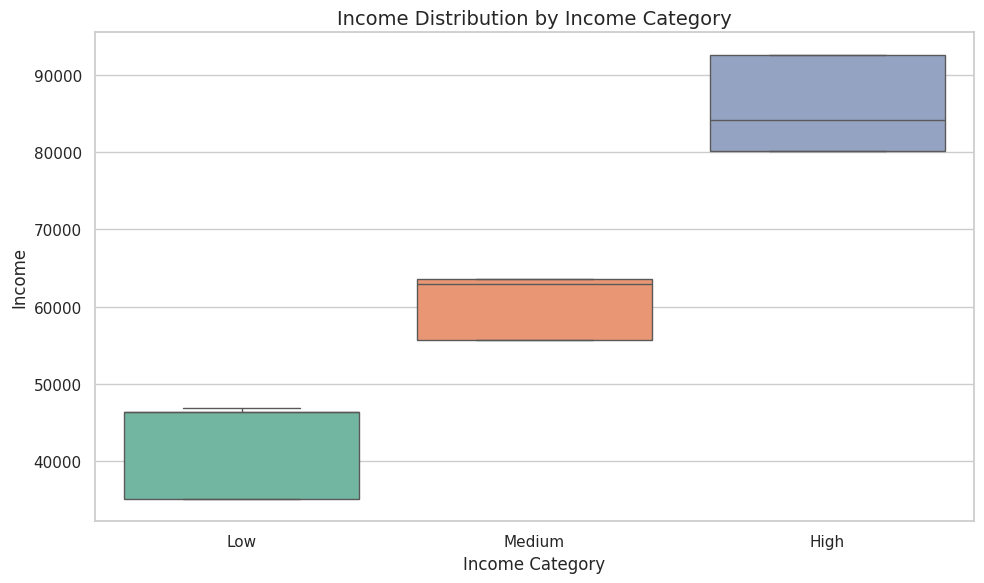

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/transformed_data.csv'
data = pd.read_csv(file_path)

# Set up the visualization style
sns.set(style="whitegrid")

# Create a box plot for Income distribution by IncomeCategory
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='IncomeCategory', y='Income', palette="Set2")

# Add titles and labels
plt.title('Income Distribution by Income Category', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Income', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


The X-axis of the boxplot represents income categories, including Low, Medium, and High. These categories group the data based on income levels. The Y-axis represents the numerical income values corresponding to each category. The boxplot for each income category includes several key features. The box represents the interquartile range (IQR), which contains the middle 50% of the data, ranging from the 25th to the 75th percentile. Inside the box, a horizontal line indicates the median income for that category. The whiskers extend from the box to show the range of data, reaching up to 1.5 times the IQR from the quartiles. Any data points outside the whiskers are considered potential outliers, highlighting values that are unusually high or low relative to the rest of the data.

# **Visualization 2:**

**Membership Duration Histogram**

This visualization uses a histogram with a KDE plot (Kernel Density Estimate) to show the frequency distribution of membership durations. It provides insights into how long customers typically stay subscribed.

python
Copy code


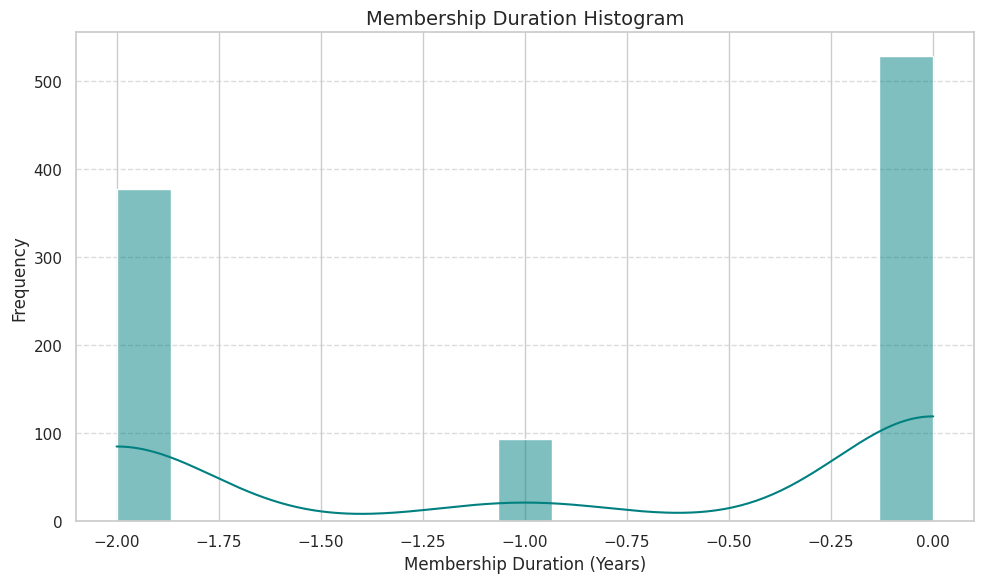

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MembershipDuration', bins=15, kde=True, color='teal')
plt.title('Membership Duration Histogram', fontsize=14)
plt.xlabel('Membership Duration (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The X-Axis represents the membership duration in years, with values appearing to be standardized, likely as z-scores, as they range from approximately -2 to 0. This standardization helps normalize the data for clearer analysis. The Y-Axis shows the frequency, which reflects the count of data points that fall within each bin or range of membership duration. Each histogram bar corresponds to a specific range of membership durations, and the height of the bar indicates the frequency of data points within that range—taller bars signify higher frequencies. The density curve, which overlays the histogram, represents the estimated probability density function (PDF) of the data. This smooth line provides a clearer visual representation of the distribution’s overall shape, offering insight into the concentration of membership durations across the dataset. Together, the histogram bars and density curve allow for an intuitive understanding of the membership duration distribution, highlighting patterns such as clustering or skewness within the data.

# **Visualization 3**:

**Average Income by City and Subscription Plan**

This visualization uses a bar chart to show the average income of customers grouped by city and subscription plan. It highlights differences in income levels among customers with different subscription plans across cities.

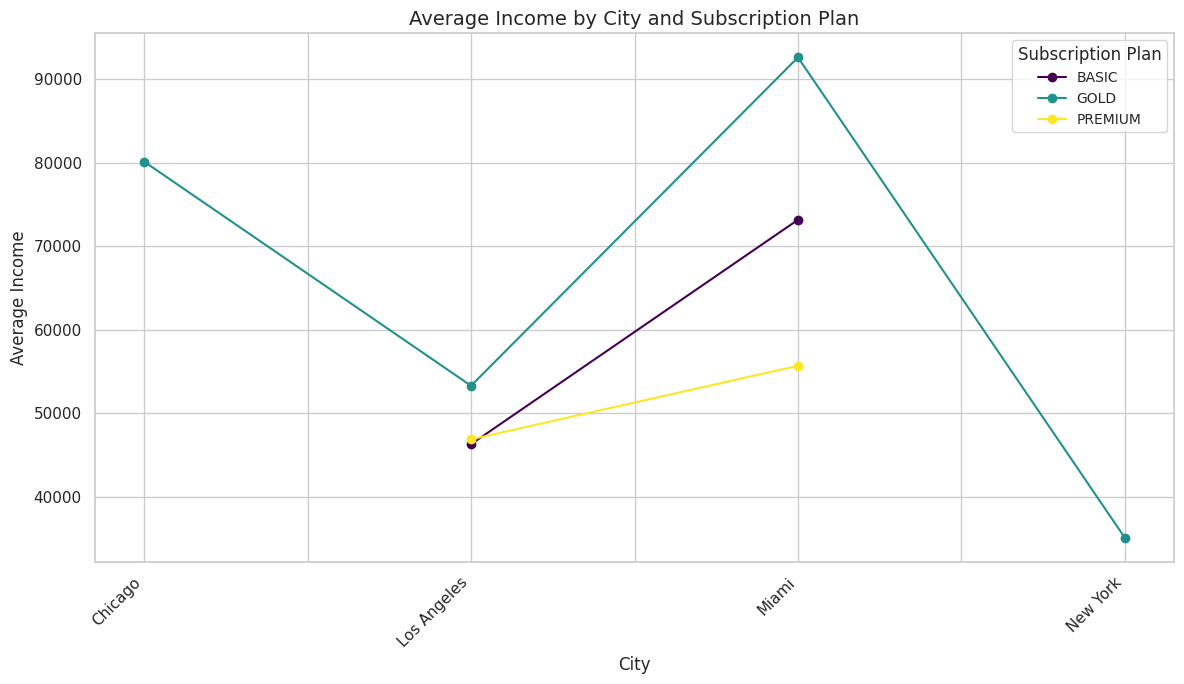

In [40]:
# Calculate average income grouped by City and SubscriptionPlan
avg_income = data.groupby(['City', 'SubscriptionPlan'])['Income'].mean().unstack()

# Plot the data as a line graph
avg_income.plot(kind='line', figsize=(12, 7), colormap='viridis', marker='o')
plt.title('Average Income by City and Subscription Plan', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subscription Plan', fontsize=10)
plt.tight_layout()
plt.show()



The X-axis represents different cities—Chicago, Los Angeles, Miami, and New York—showing a comparison of income levels across these urban locations. The Y-axis represents the average income within each city, allowing for an easy comparison of income levels across locations. The plot includes multiple lines, each representing a different subscription plan, such as "BASIC," "GOLD," and "PREMIUM." Each point on these lines corresponds to the average income for a specific city and subscription plan combination, helping to visualize how income varies by both location and subscription tier. This layout allows for a detailed comparison of income levels across cities and subscription plans, highlighting any significant trends or differences in earnings tied to both geographic and service-specific factors.

# **Visualization 4:**

 **Count of High Income Customers by City**

This visualization uses a bar chart to display the count of customers identified as "high income" in each city. This metric can be used to identify cities with a greater concentration of affluent customers.

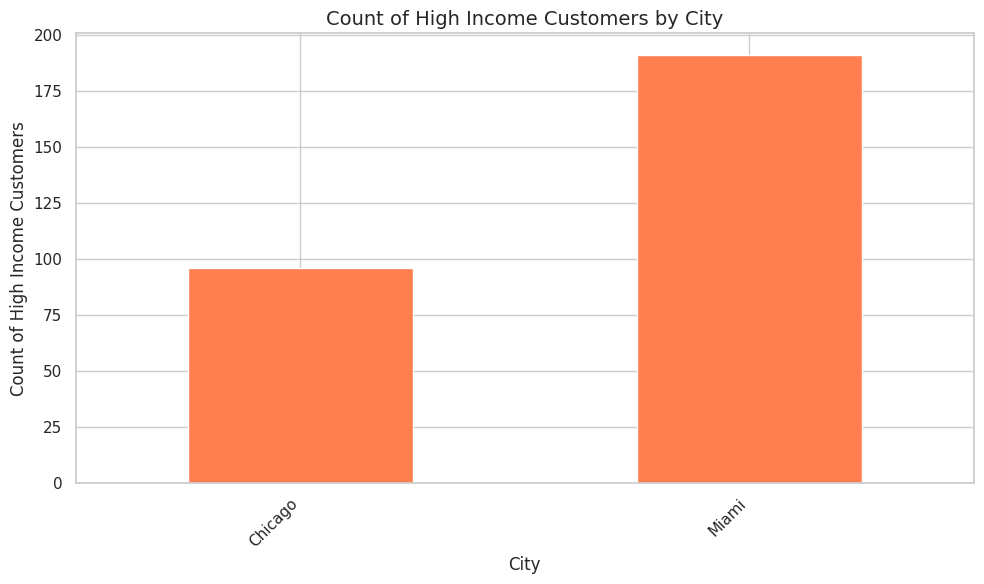

In [46]:
high_income_counts = data[data['HighIncomeCustomer']].groupby('City')['CustomerID'].count()
high_income_counts.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Count of High Income Customers by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count of High Income Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The X-axis compares two cities: Chicago and Miami, providing a direct contrast between the two in terms of high-income customers. The Y-axis represents the count of high-income customers, defined as individuals whose income exceeds a specific threshold, likely $80,000 or more. The plot features bars, with the bar for Miami being significantly taller than that for Chicago, indicating that Miami has a much larger number of high-income customers. In contrast, Chicago shows a relatively lower count of high-income customers. This comparison highlights the stark difference between the two cities in terms of their high-income customer base, suggesting that Miami might be a more favorable location for attracting wealthier individuals compared to Chicago.

# **Project Overview**

**"Harnessing Data for Smarter Decision-Making:** Insights into Income Distribution and Membership Duration"

In today’s fast-paced world, organizations need to leverage data to understand their target audience better and make informed decisions. This project has provided valuable insights into income distribution and membership duration, which can be essential in shaping strategies for customer engagement, retention, and segmentation. By exploring these patterns, you can make more data-driven decisions that resonate with your audience’s behaviors and needs.

**Income Distribution Insights**

The income distribution analysis focuses on three distinct income

**categories:** Low, Medium, and High.
 Here’s what the data reveals:

**Income Variability:**

The "Low" income category shows a narrow distribution, indicating that individuals within this category have similar income levels. This consistency suggests that any program or offering targeting this group can be standardized for greater efficiency.
On the other hand, the "High" income category shows a wider spread, meaning there are significant income disparities within this group. The variability suggests that targeting this group may require more tailored solutions, offering a range of products or services that cater to diverse financial capabilities.

**Median Income Trends:**

The median income increases as we progress from Low to High. This clear gradient between the categories highlights the predictable progression in income levels. It indicates that interventions or strategies aimed at each group need to reflect their respective financial contexts.
Implications for Action:

**For the Low-income group:** Businesses and organizations should focus on providing accessible, affordable solutions. This could include financial assistance, budget-friendly services, or products that support financial growth within this group.
For the Medium-income group: Offer a range of mid-tier products that strike a balance between affordability and quality. These individuals may appreciate well-priced options that provide value without being overly expensive.

**For the High-income group**: Tailor premium offerings and exclusive products that cater to the diverse needs of this group. This segment is more likely to invest in high-quality, luxurious, or niche products.
Membership Duration Insights
The second key insight comes from analyzing membership duration data, which reveals a bimodal distribution:

**Short-Term Membership:**

One group consists of short-term members who may have initially joined but didn’t stay for long. This group could represent individuals who were either dissatisfied, didn’t find enough value, or simply didn't engage deeply with the product or service.

**Long-Term Membership:**

The other group consists of long-term members who have stayed loyal to the organization. This group likely derives consistent value from the offerings and is satisfied with the service or product. They are potentially the most engaged users and are a valuable asset for future business growth.

**Implications for Action:**

**For short-term members:** The focus should be on understanding why they left early. Was it due to unmet expectations, lack of personalization, or poor user experience? Addressing these gaps through targeted retention strategies could convert some of these short-term members into long-term, loyal ones.

**For long-term members:** Strategies for retaining these members could include loyalty programs, exclusive offers, or further engagement tactics to ensure they remain satisfied and committed over time.

**Conclusion**
These data-driven insights provide a strong foundation for creating strategies that are aligned with your audience's behaviors. By focusing on the nuances of income levels and membership durations, you can ensure that your approach is targeted, effective, and valuable. Data is a powerful tool—it’s time to leverage it to foster loyalty, enhance customer satisfaction, and achieve long-term success.